# Yield Curve Analysis

A yield curve is a way to measure bond investors' feelings about risk, and can have a tremendous impact on the returns you receive on your investments.

In [81]:
import numpy as np
import pandas as pd
import nasdaqdatalink
import numpy as np
from lmfit import Model
from plotnine import stat_function, geom_point, ggtitle,ggplot, aes, geom_line, scale_y_continuous, labs, scale_x_date, theme_bw, theme, scale_color_manual

In [87]:
nasdaqdatalink.ApiConfig = 'RMnPFUxgMqf6wSWzonAC'
daily_interest_rates= nasdaqdatalink.get("USTREASURY/YIELD", start_date="2021-11-01", end_date="2021-12-31")
daily_interest_rates.head(5)

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
2021-11-01,0.05,0.09,0.05,0.06,0.15,0.50,0.79,1.20,1.46,1.58,2.01,1.98
2021-11-02,0.05,0.06,0.05,0.07,0.15,0.46,0.73,1.15,1.42,1.56,1.97,1.96
2021-11-03,0.05,0.07,0.05,0.07,0.17,0.47,0.77,1.19,1.46,1.60,2.01,2.00
2021-11-04,0.05,0.05,0.04,0.07,0.14,0.41,0.69,1.10,1.37,1.53,1.96,1.96
2021-11-05,0.05,0.06,0.05,0.07,0.14,0.39,0.66,1.04,1.30,1.45,1.88,1.87


In [92]:
daily_interest_rates.tail(5)

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
2021-12-27,0.04,0.05,0.06,0.21,0.33,0.76,0.98,1.26,1.41,1.48,1.92,1.88
2021-12-28,0.03,0.04,0.06,0.20,0.39,0.74,0.99,1.27,1.41,1.49,1.94,1.90
2021-12-29,0.01,0.02,0.05,0.19,0.38,0.75,0.99,1.29,1.47,1.55,2.00,1.96
2021-12-30,0.06,0.06,0.05,0.19,0.38,0.73,0.98,1.27,1.44,1.52,1.97,1.93
2021-12-31,0.06,0.05,0.06,0.19,0.39,0.73,0.97,1.26,1.44,1.52,1.94,1.90


In [93]:
#  compute the average yield for each benchmark security.  .
average_yield_nov = daily_interest_rates[:'2021-11-30'].mean(axis=0)
average_yield_dec = daily_interest_rates['2021-12-01':].mean(axis=0)
print('Average Yield Benchmark for November:{}'.format(average_yield_nov))
print('Average Yield Benchmark for December:{}'.format(average_yield_dec))

Average Yield Benchmark for November:1 MO     0.0705
2 MO     0.0530
3 MO     0.0515
6 MO     0.0730
1 YR     0.1790
2 YR     0.5080
3 YR     0.8195
5 YR     1.2025
7 YR     1.4480
10 YR    1.5595
20 YR    1.9735
30 YR    1.9355
dtype: float64
Average Yield Benchmark for December:1 MO     0.038182
2 MO     0.048636
3 MO     0.058636
6 MO     0.145455
1 YR     0.299091
2 YR     0.680000
3 YR     0.952727
5 YR     1.229545
7 YR     1.395909
10 YR    1.465000
20 YR    1.899545
30 YR    1.847727
dtype: float64


In [95]:
#  compute the standard deviation  yield for each benchmark security.  .
average_yield_nov = daily_interest_rates[:'2021-11-30'].std(axis=0)
average_yield_dec = daily_interest_rates['2021-12-01':].std(axis=0)
print('Average Yield Benchmark for November:{}'.format(average_yield_nov))
print('Average Yield Benchmark for December:{}'.format(average_yield_dec))

Average Yield Benchmark for November:1 MO     0.029820
2 MO     0.013018
3 MO     0.005871
6 MO     0.014546
1 YR     0.030070
2 YR     0.066380
3 YR     0.084758
5 YR     0.082645
7 YR     0.078780
10 YR    0.068401
20 YR    0.068998
30 YR    0.070073
dtype: float64
Average Yield Benchmark for December:1 MO     0.017630
2 MO     0.009409
3 MO     0.008888
6 MO     0.035953
1 YR     0.045451
2 YR     0.048697
3 YR     0.043663
5 YR     0.043147
7 YR     0.042163
10 YR    0.045539
20 YR    0.049133
30 YR    0.064655
dtype: float64


Graph the 12 benchmark securities for the 1 months on 1 plot.


<AxesSubplot:xlabel='Date', ylabel='Daily Interest Rates'>

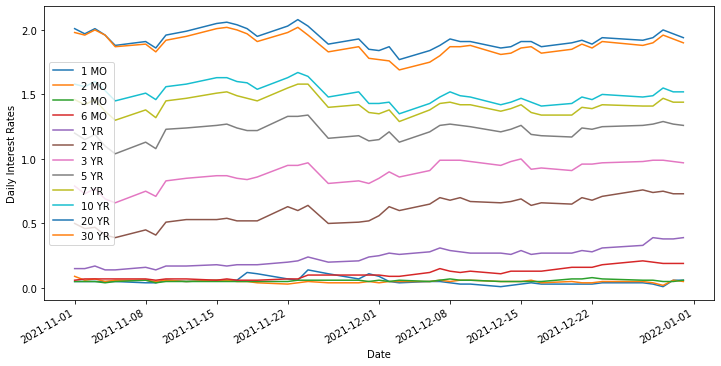

In [96]:
# Graph the 12 benchmark securities for the 2 months on 1 plot.  
#That means the 12 yield series are overlaid on the same area.  
#Add a legend


print('Graph the 12 benchmark securities for the 1 months on 1 plot.')

daily_interest_rates.plot(kind="line", xlabel="Date", ylabel="Daily Interest Rates", figsize=(12,6))

Graph the 6 benchmark securities for the 1 months on 1 plot.


<AxesSubplot:xlabel='Date', ylabel='Daily Interest Rates'>

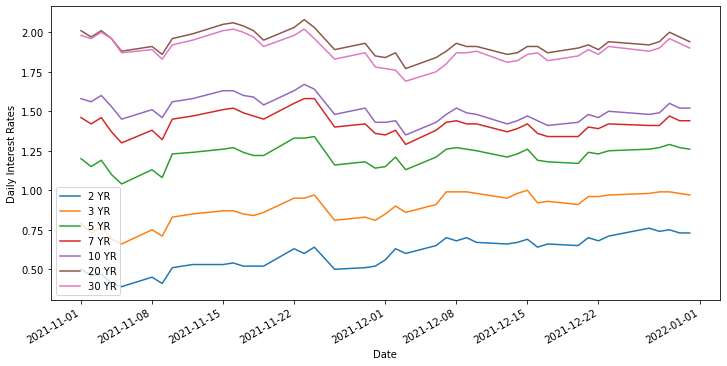

In [97]:
daily_interest_rates = daily_interest_rates.iloc[:, 5:12]
# Graph the 6 benchmark securities for the 2 months on 1 plot.  
#That means the 6 yield series are overlaid on the same area.  
#Add a legend


print('Graph the 6 benchmark securities for the 1 months on 1 plot.')

daily_interest_rates.plot(kind="line", xlabel="Date", ylabel="Daily Interest Rates", figsize=(12,6))

# Fitting the Yield Curve

# Nelson-Siegel formula:  
$r(T) = \beta_0 + \beta_1*\frac{1-e^\frac{-T}{\tau}}{\frac{T}{\tau}} + \beta_2*(\frac{1-e^\frac{-T}{\tau}}{\frac{T}{\tau}} - e^\frac{-T}{\tau})$  
https://blog.deriscope.com/index.php/en/yield-curve-excel-quantlib-nelson-siegel-svensson  
http://janroman.dhis.org/stud/NS.pdf  
https://efmaefm.org/0EFMAMEETINGS/EFMA%20ANNUAL%20MEETINGS/2010-Aarhus%20old/EFMA2010_0387_fullpaper.pdf

C:\Users\Emiana\AppData\Local\Temp/ipykernel_3644/3311093049.py:17: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
C:\Users\Emiana\AppData\Local\Temp/ipykernel_3644/3311093049.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


{'beta0': 2.0638906848145626, 'beta1': -2.557814136674373, 'beta2': 0.0003707448578735887, 'tau': 1.8102743308326212}


C:\ProgramData\Anaconda3\lib\site-packages\plotnine\geoms\geom_path.py:75: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


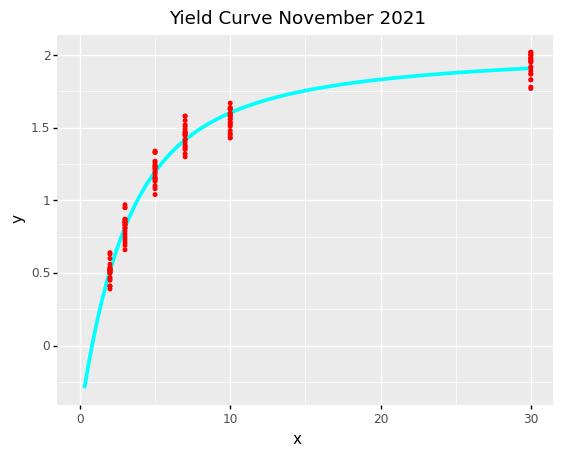


{'beta0': 1.9546886337831417, 'beta1': -1.8996720557562, 'beta2': -0.0002040791516407211, 'tau': 2.1979524382569755}


C:\ProgramData\Anaconda3\lib\site-packages\plotnine\geoms\geom_path.py:75: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


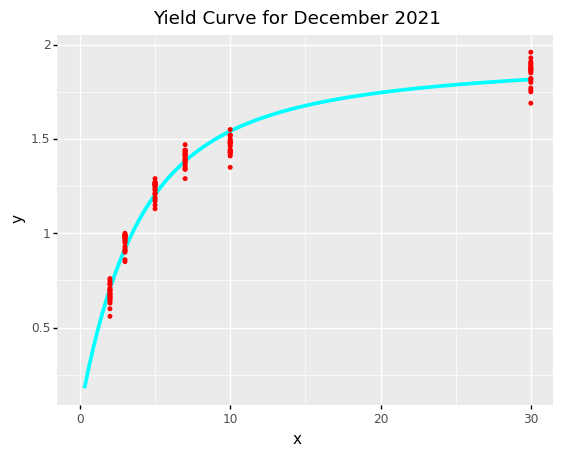

In [100]:
maturities = np.array([2,3,5,7,10,30])
y = np.array([
    daily_interest_rates['2 YR'][0],
    daily_interest_rates['3 YR'][0],
    daily_interest_rates['5 YR'][0],
    daily_interest_rates['7 YR'][0],
    daily_interest_rates['10 YR'][0],
    daily_interest_rates['30 YR'][0]
])

def nelson_siegel(X,beta0,beta1,beta2,tau):
  return beta0 + (beta1*(1-np.exp(-X/tau))/(X/tau)) + beta2 * ((1-np.exp(-X/tau))/(X/tau) - np.exp(-X/tau))

NS_model = Model(nelson_siegel)

# Fit the yield curve each day using the 6 benchmark yield
yield_curve_parameters = pd.Series([])
for index in range(len(daily_interest_rates)):
  params = NS_model.make_params(beta0=2,beta1=-0.5,beta2=-1,tau=4)
  y = np.array([
    daily_interest_rates['2 YR'][index],
    daily_interest_rates['3 YR'][index],
    daily_interest_rates['5 YR'][index],
    daily_interest_rates['7 YR'][index],
    daily_interest_rates['10 YR'][index],
    daily_interest_rates['30 YR'][index]
])
  result = NS_model.fit(y, params, X=maturities)
  yield_curve_parameters[index] = result.best_values
yield_curve_parameters.index = daily_interest_rates.index
daily_interest_rates['Yield Curve Parameters'] = yield_curve_parameters
    
# Fitting the Yield Curve for first 6 months
Nov = np.array([
    daily_interest_rates['2 YR'][:'2021-12-01'],
    daily_interest_rates['3 YR'][:'2021-12-01'],
    daily_interest_rates['5 YR'][:'2021-12-01'],
    daily_interest_rates['7 YR'][:'2021-12-01'],
    daily_interest_rates['10 YR'][:'2021-12-01'],
    daily_interest_rates['30 YR'][:'2021-12-01']
])

Dec = np.array([
    daily_interest_rates['2 YR']['2021-12-01':],
    daily_interest_rates['3 YR']['2021-12-01':],
    daily_interest_rates['5 YR']['2021-12-01':],
    daily_interest_rates['7 YR']['2021-12-01':],
    daily_interest_rates['10 YR']['2021-12-01':],
    daily_interest_rates['30 YR']['2021-12-01':]
])

params = NS_model.make_params(beta0=2,beta1=-0.5,beta2=-1,tau=4)
maturities_nov = np.array([[2,3,5,7,10,30],]*21).transpose()
result_nov = NS_model.fit(Nov,params, X=maturities_nov)

print(result_nov.best_values)
beta0 = result_nov.best_values['beta0']
beta1 = result_nov.best_values['beta1']
beta2 = result_nov.best_values['beta2']
tau = result_nov.best_values['tau']
print(ggplot() + 
stat_function(pd.DataFrame(data={"x": [0, 30]}), aes(x="x"),fun=lambda T: beta0 + (beta1*(1-np.exp(-T/tau))/(T/tau)) + beta2 * ((1-np.exp(-T/tau))/(T/tau) - np.exp(-T/tau)), color = 'cyan', size = 1.5) +
geom_point(pd.DataFrame(data={'x':maturities_nov.flatten('F'), 'y':Nov.flatten('F')}), aes(x='x', y='y'), color='red', size = 1) + ggtitle("Yield Curve November 2021"))

maturities_dec = np.array([[2,3,5,7,10,30],]*22).transpose()
result_dec = NS_model.fit(Dec, params, X=maturities_dec)
print(result_dec.best_values)
beta0 = result_dec.best_values['beta0']
beta1 = result_dec.best_values['beta1']
beta2 = result_dec.best_values['beta2']
tau = result_dec.best_values['tau']
print(ggplot() + 
stat_function(pd.DataFrame(data={"x": [0, 30]}), aes(x="x"),fun=lambda T: beta0 + (beta1*(1-np.exp(-T/tau))/(T/tau)) + beta2 * ((1-np.exp(-T/tau))/(T/tau) - np.exp(-T/tau)), color = 'cyan', size = 1.5) +
geom_point(pd.DataFrame(data={'x':maturities_dec.flatten('F'), 'y':Dec.flatten('F')}), aes(x='x', y='y'), color='red', size = 1) + ggtitle("Yield Curve for December 2021"))